In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df=pd.read_csv("resultado.csv")

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Categoria_Edad
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Adulto mayor
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adulto
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Adulto mayor
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adulto
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Adulto mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Adulto mayor
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Adulto
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Adulto
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Adulto


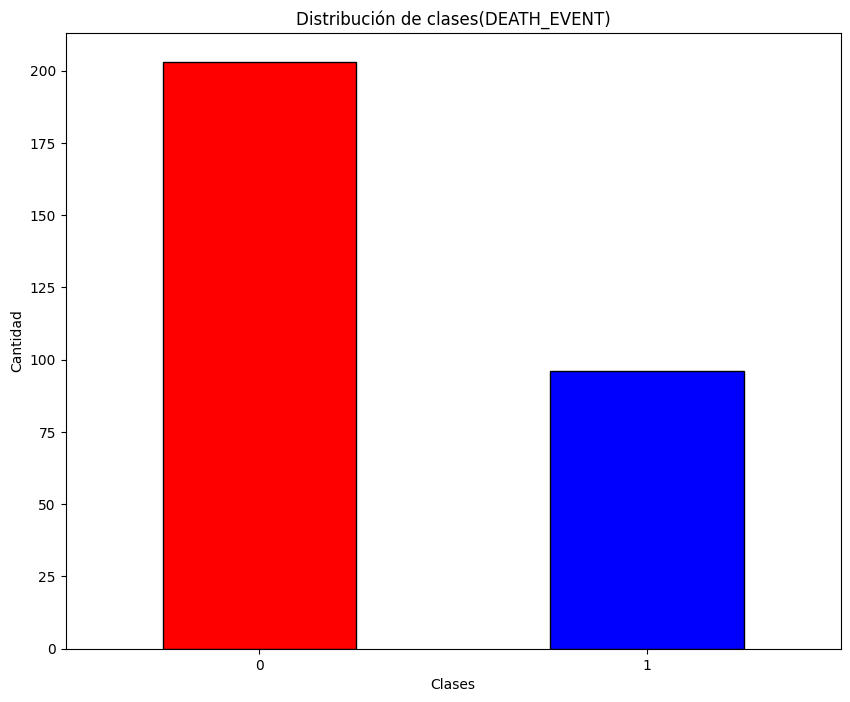

Accuracy del árbol de decisión: 0.6666666666666666


In [18]:
"""Ahora vamos a empezar a usar el dataset para lo que fue creado, ajustar un modelo de clasificación.

Grafica la distribución de clases (con la librería de tu preferencia) para analizar si este dataset está balanceado o no
Realiza la partición del dataset en conjunto de entrenamiento y test
Esta partición debe ser estratificada
Para lograrlo debes usar el parámetro como stratify=y en la función train_test_split
Ajusta un árbol de decisión y calcula el accuracy sobre el conjunto de test.
Trata de mover los valores de los parámetros para lograr la mayor accuracy que puedas.
Nota:

No olvides eliminar la colúmna categoria_edad.

"""

df=pd.read_csv("resultado.csv")

# Elimina la columna 'categoria_edad' del dataframe
df = df.drop(['Categoria_Edad'], axis=1)

# Grafica la distribución de clases
plt.figure(figsize=(10, 8))
df['DEATH_EVENT'].value_counts().plot(kind='bar', edgecolor= "black",color=['r', 'b'])
plt.title('Distribución de clases(DEATH_EVENT)')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

# Partición estratificada del dataset en conjunto de entrenamiento y test
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ajusta un árbol de decisión
model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Puedes ajustar max_depth y otros parámetros
model.fit(X_train, y_train)

# Predice sobre el conjunto de test
y_pred = model.predict(X_test)

# Calcula el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del árbol de decisión: {accuracy}')